# A. Stoichiometry and reaction currents

1) First recreate the stoichiometric matrices for the modules 1 and 2 (eq (45) and eq(46))

2) Then lets build a hypergraph to describe the modules 1,2

In [18]:
import hypernetx as hnx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import warnings 
#init_printing(use_unicode=True)
warnings.simplefilter('ignore')

from sympy import *

## Device 1 SM and hypergraph


In [19]:

# first need to define a matrix that contains the reactions between the species 
# (the stoichiometric matrix) using sympy


stoich_matrix_1 = Matrix( [[-1, 1, 0], [1, -1, -1], [0, 0, 1], [-1, 0, -1], [0, 1, 0]] )

# print the stoichiometric matrix for device 1: 

print("Full stoichiometric matrix for device 1")

stoich_matrix_1 # this is (45)


Full stoichiometric matrix for device 1


Matrix([
[-1,  1,  0],
[ 1, -1, -1],
[ 0,  0,  1],
[-1,  0, -1],
[ 0,  1,  0]])

In [20]:
# Can split the system into internal X and external Y species according to (45):

stoich_matrix_1_X = stoich_matrix_1[:3, :]

print("Reduced SM for internal components:")
stoich_matrix_1_X

Reduced SM for internal components:


Matrix([
[-1,  1,  0],
[ 1, -1, -1],
[ 0,  0,  1]])

In [21]:
# Can split the system into internal X and external Y species according to (45):

stoich_matrix_1_Y = stoich_matrix_1[3:, :]

print("Reduced SM matrix for external components")
stoich_matrix_1_Y

Reduced SM matrix for external components


Matrix([
[-1, 0, -1],
[ 0, 1,  0]])


Now we have the stoichiometric matrices we know the relationships between species and reactions
so now can make the hypergraphs

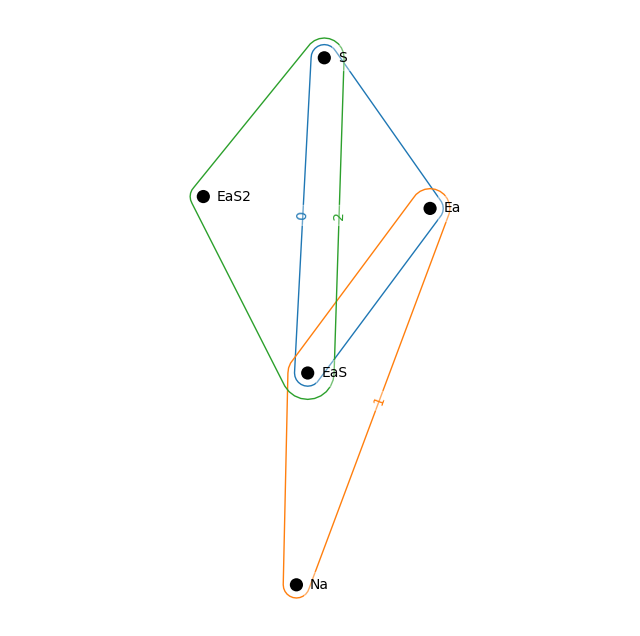

In [22]:
# device 1

node_labels_1 = {0: 'Ea', 1: 'EaS', 2: 'EaS2', 3: 'S', 4: 'Na'}

H = hnx.Hypergraph.from_incidence_matrix(stoich_matrix_1) 

hnx.draw(H, node_labels = node_labels_1)

# the full graph for device 1:

## Device 2 SM and hypergraph

In [23]:
stoich_matrix_2 = Matrix([[-1, 0, 1, 0, 0], # first row of internal
                           [1, -1, 0, -1, 0], 
                           [0, 1, -1, 0, 1], 
                           [0, 0, 0, 1, -1],
                             [0, 0, 0, -1, 0], # first row external 
                             [0, 0, 0, 0, 1],
                             [-1, 0, 0, 0, 0],
                             [0, 0, 1, 0, 0]])

stoich_matrix_2 # this is just (46)

Matrix([
[-1,  0,  1,  0,  0],
[ 1, -1,  0, -1,  0],
[ 0,  1, -1,  0,  1],
[ 0,  0,  0,  1, -1],
[ 0,  0,  0, -1,  0],
[ 0,  0,  0,  0,  1],
[-1,  0,  0,  0,  0],
[ 0,  0,  1,  0,  0]])

In [24]:
# split full SM into internal:

stoich_matrix_2_X = stoich_matrix_2[:4,:]

stoich_matrix_2_X

Matrix([
[-1,  0,  1,  0,  0],
[ 1, -1,  0, -1,  0],
[ 0,  1, -1,  0,  1],
[ 0,  0,  0,  1, -1]])

In [25]:
# extract external part

stoich_matrix_2_Y = stoich_matrix_2[4:,:]

stoich_matrix_2_Y

Matrix([
[ 0, 0, 0, -1, 0],
[ 0, 0, 0,  0, 1],
[-1, 0, 0,  0, 0],
[ 0, 0, 1,  0, 0]])

### Now can build the hypergraph for device 2: first i will try by making seperate hypergraphs for internal, external then doing the full graph

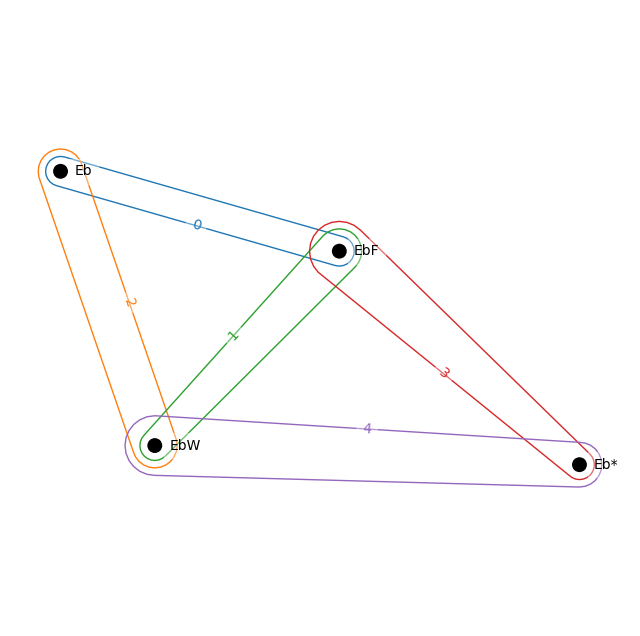

In [26]:
# First for internal:

node_labels_2_X = {0: 'Eb', 1: 'EbF', 2: 'EbW', 3: 'Eb*'} # in order according to (50)

graph_X = hnx.Hypergraph.from_incidence_matrix(stoich_matrix_2_X) 

hnx.draw(graph_X, node_labels = node_labels_2_X)

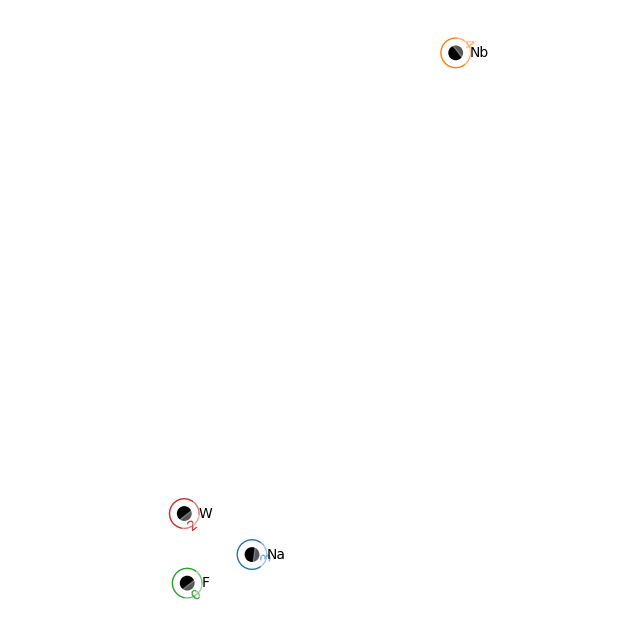

In [27]:
# Now for external:

node_labels_2_Y = {0: 'Na', 1: 'Nb', 2: 'F', 3: 'W'} # in order according to (50)

graph_Y = hnx.Hypergraph.from_incidence_matrix(stoich_matrix_2_Y) 

hnx.draw(graph_Y, node_labels = node_labels_2_Y)

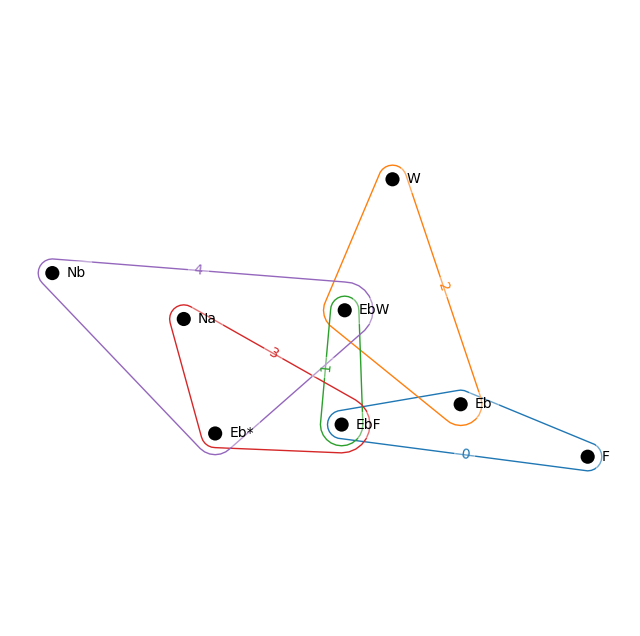

In [28]:
# full graph with internal and external species


graph_labels = {0: 'Eb', 1: 'EbF', 2: 'EbW', 3: 'Eb*', 4: 'Na', 5: 'Nb', 6: 'F', 7: 'W'} # in order according to (49)

graph_device_2 = hnx.Hypergraph.from_incidence_matrix(stoich_matrix_2) 

hnx.draw(graph_device_2, node_labels = graph_labels)

#  !! should Na really be in the purple loop? I think I have labelled my species correctly !!

## Now make graph for combined devices:

First we need to build the SM for device 3: the combined devices 1,2. According to Raux 2025 (eq100) and followinf description, the SM for device 3 is:

In [29]:
# this is built according to the species order: 
# 
graph_nodes_d3 = {0: 'Ea', 1: 'EaS', 2: 'EaS2', 3: 'Na', 4: 'Eb', 5: 'EbF', 6: 'EbW', 7: 'Eb*', 8: 'S', 9: 'Nb', 10: 'F', 11: 'W'}

# should be an 11 x 8 matrix

# row 1 of SM for d3 is built from the row according to 'Ea' in the SM_X of devices 1,2. Note, there is no 'Ea' in device 2 so just take the first row of device 1 and add 0s 
# onto the end to make it 8 values long

row1_Ea_d1 = stoich_matrix_1_X.row(0) # gets row 1 of SM_X for device 1 --> corresponds to species Ea

row1_Ea_d2 = zeros(1, (8 - row1_Ea_d1.cols) ) # since Ea is NOT in either reduced SM for device 2, we make a vector of length long enough to fill SM row of device 3 (full of 0s)

row1_d3 = row1_Ea_d1.row_join(row1_Ea_d2) # join them together

# row 2 is same procedure for EaS:

row2_EaS_d1 = stoich_matrix_1_X.row(1) # gets row 2 of SM_X for device 1 --> corresponds to species EaS

row2_EaS_d2 = zeros(1, (8 - row2_EaS_d1.cols) ) # since EaS is NOT in either reduced SM for device 2, we make a vector of length long enough to fill SM row of device 3 (full of 0s)

row2_d3 = row2_EaS_d1.row_join(row2_EaS_d2)

# row 3 same again for EaS2:

row3_EaS2_d1 = stoich_matrix_1_X.row(2) # gets row 2 of SM_X for device 1 --> corresponds to species EaS

row3_EaS2_d2 = zeros(1, (8 - row3_EaS2_d1.cols) ) # since EaS is NOT in either reduced SM for device 2, we make a vector of length long enough to fill SM row of device 3 (full of 0s)

row3_d3 = row3_EaS2_d1.row_join(row3_EaS2_d2)

row3_d3

# now we do row 4 corresponding to Na, which DOES appear in both: note, Na is in fact the 5th row in SM^1 and SM^2

row5_Na_d1 = stoich_matrix_1.row(4)
row5_Na_d2 = stoich_matrix_2.row(4)

row4_d3 = row5_Na_d1.row_join(row5_Na_d2)

row4_d3

## STOP here - must be an easier way to calculate. first 4 rows are the matrix:

stoich_matrix_3_so_far = row1_d3.col_join(row2_d3).col_join(row3_d3).col_join(row4_d3)

print("First 4 rows of the Stoichiometric Matrix for device 3 are: ") # this is correct so far according to eq(100)
stoich_matrix_3_so_far



First 4 rows of the Stoichiometric Matrix for device 3 are: 


Matrix([
[-1,  1,  0, 0, 0, 0,  0, 0],
[ 1, -1, -1, 0, 0, 0,  0, 0],
[ 0,  0,  1, 0, 0, 0,  0, 0],
[ 0,  1,  0, 0, 0, 0, -1, 0]])

In [30]:
# For now, we will just write out the SM as it appears in the paper, then use this to calculate the hypergraph:

stoich_matrix_3 = Matrix([[-1,  1,  0,  0,  0,  0,  0, 0],
    [ 1, -1, -1,  0,  0,  0,  0, 0],
    [ 0,  0,  1,  0,  0,  0,  0, 0],
    [ 0,  1,  0,  0,  0,  0, -1, 0],
    [ 0,  0,  0, -1,  0,  1,  0, 0],
    [ 0,  0,  0,  1, -1,  0, -1, 0],
    [ 0,  0,  0,  0, 1,  -1, 0, 1],
    [ 0,  0,  0,  0,  0,  0,  1, -1],
    [-1,  0, -1,  0,  0,  0,  0, 0],
    [ 0,  0,  0,  0,  0,  0,  0, 1],
    [ 0,  0,  0, -1,  0,  0,  0, 0],
    [ 0,  0,  0,  0,  0,  1,  0, 0]]

)

stoich_matrix_3

Matrix([
[-1,  1,  0,  0,  0,  0,  0,  0],
[ 1, -1, -1,  0,  0,  0,  0,  0],
[ 0,  0,  1,  0,  0,  0,  0,  0],
[ 0,  1,  0,  0,  0,  0, -1,  0],
[ 0,  0,  0, -1,  0,  1,  0,  0],
[ 0,  0,  0,  1, -1,  0, -1,  0],
[ 0,  0,  0,  0,  1, -1,  0,  1],
[ 0,  0,  0,  0,  0,  0,  1, -1],
[-1,  0, -1,  0,  0,  0,  0,  0],
[ 0,  0,  0,  0,  0,  0,  0,  1],
[ 0,  0,  0, -1,  0,  0,  0,  0],
[ 0,  0,  0,  0,  0,  1,  0,  0]])

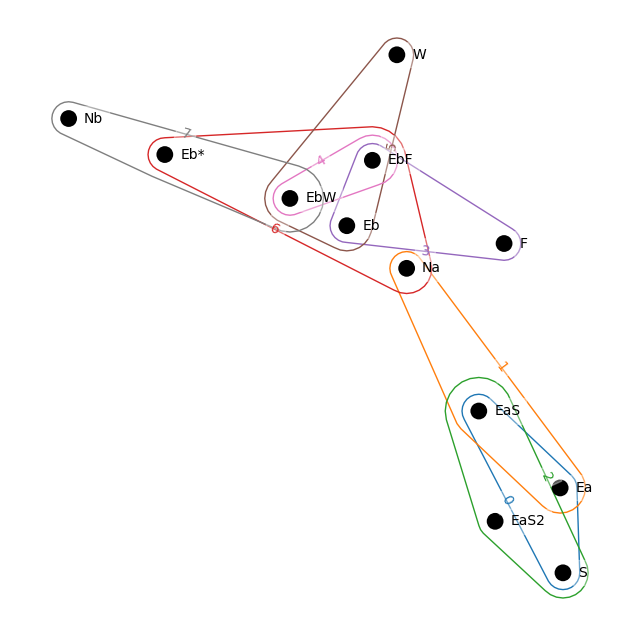

In [31]:
# now create hypergraph using device nodes defined in previous cell

graph_device_3 = hnx.Hypergraph.from_incidence_matrix(stoich_matrix_3) 

hnx.draw(graph_device_3, node_labels = graph_nodes_d3)

# B. From reaction to cycle currents

In [32]:
import hypernetx as hnx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import warnings 
init_printing(use_unicode=True)
warnings.simplefilter('ignore')

from sympy import *

In [33]:
#The reaction currents are:

j1, j2, j3, j4, j5, j6, j7, j8 = symbols("j1 j2 j3 j4 j5 j6 j7 j8") # define symbolic variables so we can solve linear equations later

_j1 = Matrix([j1, j2, j3]) # these vectors contain the edge currents for each device 1,2 eq(51,52)

_j2 = Matrix([j4, j5, j6, j7, j8])

_j2


⎡j₄⎤
⎢  ⎥
⎢j₅⎥
⎢  ⎥
⎢j₆⎥
⎢  ⎥
⎢j₇⎥
⎢  ⎥
⎣j₈⎦

In [34]:
# The reaction currents above are linearly dependent - so we want to find a linearly independent subset. Can do this by finding the kernel of the
# internal SM_X matrices

nullspace_1_X = stoich_matrix_1_X.nullspace()

nullspace_1_X = Matrix(nullspace_1_X) # we get a single vector of internal currents that result in a steady state

C_1 = nullspace_1_X

C_1

⎡1⎤
⎢ ⎥
⎢1⎥
⎢ ⎥
⎣0⎦

In [35]:
nullspace_2_X = stoich_matrix_2_X.nullspace()

nullspace_2_X_m = nullspace_2_X[0].row_join(nullspace_2_X[1]) # make the nullspace into a matrix of adjacent columns

C_2 = nullspace_2_X_m

C_2


⎡1  0 ⎤
⎢     ⎥
⎢1  -1⎥
⎢     ⎥
⎢1  0 ⎥
⎢     ⎥
⎢0  1 ⎥
⎢     ⎥
⎣0  1 ⎦

In [36]:
# this above nullspace is not the same as in the paper eq(53) so is there a matrix s.t C_python * P = C_paper?

C_paper = Matrix([[0,1], [-1,1], [0,1], [1,0], [1,0]]) # C^(2) from eq(53)

# since C_2, C_paper are both not square, they are not ordinary invertible --> use the Moore-Penrose invertibility 
# so P = C_2_(Moore-Penrose) * C_paper

C_2_MPI = ( C_2.T * C_2).inv() * C_2.T # find Moore-Penrose inverse via 2024 paper page 3

P = C_2_MPI * C_paper
 
P # Is P analagous to Pauli Z matrix?


⎡0  1⎤
⎢    ⎥
⎣1  0⎦

In [37]:
# Check: 

C_check = C_2 * P

C_check

# works, so now set C_2 = C_check for remainder of paper

C_2 = C_check

In [38]:
# Lets find the reaction current relations: we know by eq(21): nabla_X * _j = 0

steady_state_1 = stoich_matrix_1_X * _j1

Z_1 = zeros(3,1)

Eq( steady_state_1 , Z_1) # prints nicely


⎡  -j₁ + j₂  ⎤   ⎡0⎤
⎢            ⎥   ⎢ ⎥
⎢j₁ - j₂ - j₃⎥ = ⎢0⎥
⎢            ⎥   ⎢ ⎥
⎣     j₃     ⎦   ⎣0⎦

In [39]:
steady_state_2 = stoich_matrix_2_X * _j2

Z_2 = zeros(4,1)

Eq( steady_state_2, Z_2 )

⎡  -j₄ + j₆  ⎤   ⎡0⎤
⎢            ⎥   ⎢ ⎥
⎢j₄ - j₅ - j₇⎥   ⎢0⎥
⎢            ⎥ = ⎢ ⎥
⎢j₅ - j₆ + j₈⎥   ⎢0⎥
⎢            ⎥   ⎢ ⎥
⎣  j₇ - j₈   ⎦   ⎣0⎦

In [40]:

# so we can use sympy linsolve to solve these: First for device 1:

eqs_1 = [Eq(expr, 0) for expr in steady_state_1]

# solve for (j1, j2, j3)
solution_1 = linsolve(eqs, (j1, j2, j3))

solution_1

NameError: name 'eqs' is not defined

In [ ]:
# now for device 2:

eqs_2 = [Eq(expr, 0) for expr in steady_state_2]

# solve for (j4 j5 j6 j7 j8)
solution_2 = linsolve(eqs_2, (j4, j5, j6, j7, j8))

solution_2

In [ ]:
# therefore we have calculated equations (54, 55):

reaction_current_soln_set = [Eq(j1,j2), Eq(j3,0), Eq(j3,0), Eq(j4, j6), Eq(j5, j6-j8), Eq(j7, j8)]

reaction_current_soln_set


In [ ]:
# Now we can find the cycle currents J according to J = C_MPI * _j (eq22)

C_1_MPI = ( C_1.T * C_1).inv() * C_1.T # find MPI of Cycle vector for device 1

C_2_MPI = ( C_2.T * C_2).inv() * C_2.T # find MPI of cycle matrix for device 2


In [ ]:
# Now find cycle current vector / matrix

J_1 = C_1_MPI * _j1

J_1

J_2 = C_2_MPI * _j2

In [ ]:
# But we now know that j1 = j2 so we get: (eq 56)

J_1_simplified = Matrix([j1])

J_1_simplified

Eq(J_1, J_1_simplified, evaluate = False)

⎡j₁   j₂⎤       
⎢── + ──⎥ = [j₁]
⎣2    2 ⎦       

In [ ]:
# and for device 2: (eq 57)

J_2_simplified = Matrix([[j8], [j6]])

J_2_simplified

Eq(J_2, J_2_simplified, evaluate = False)


⎡j₄   j₅   j₆   3⋅j₇   3⋅j₈⎤       
⎢── - ── + ── + ──── + ────⎥       
⎢8    4    8     8      8  ⎥   ⎡j₈⎤
⎢                          ⎥ = ⎢  ⎥
⎢3⋅j₄   j₅   3⋅j₆   j₇   j₈⎥   ⎣j₆⎦
⎢──── + ── + ──── + ── + ──⎥       
⎣ 8     4     8     8    8 ⎦       

## So now we have the Cycle currents for the internal species, lets look at the the external species


## start from eq(23): $ li = -l \nabla_Y j = -l  \nabla_Y C J = 0  $

In [ ]:
# we already have the cycle vectors C and the cycle currents J so can define the matrix of matter exchanged with chemostats
# in each cycle as _phi = nabla_Y * C  

_phi_1 = stoich_matrix_1_Y * C_1

_phi_1 # (58)


⎡-1⎤
⎢  ⎥
⎣1 ⎦

In [ ]:
# and for device 2: (58)

_phi_2 = stoich_matrix_2_Y * C_2

_phi_2



⎡-1  0 ⎤
⎢      ⎥
⎢1   0 ⎥
⎢      ⎥
⎢0   -1⎥
⎢      ⎥
⎣0   1 ⎦

# Summary so far for finding Conductance matrix for device 3:

1) Find stoichiometric matrices for internal and external components of device 1,2: $\mathbf{\nabla_X}^{(m)}$ and $\mathbf{\nabla_Y}^{(m)}$
2) Find SM for device 3: $\mathbf{\nabla}^{(3)}$
3) create reaction current vectors for devices 1,2: $\mathbf{j}^{(1)}$ and $\mathbf{j}^{(2)}$
4) find the kernel of the internal SMs for each device ( the cycle matrices ): $ \mathbf{C}^{(m)} = \ker(\mathbf{\nabla}_{X}^{(m)}) $
5) Use steady state assumption to solve the set of linear equations: $ \mathbf{\nabla}_{X} \mathbf{j} = \mathbf{0}$
6) use the cycle matrices and reaction current vectors to find the cycle currents $\mathbf{J}$ using: $\mathbf{j} = \mathbf{CJ}$
7) simplify cycle currents $\mathbf{J^{(1)}, J^{(2)}}$ using solutions from step 5)
8) find the matrices for each device that provide the matter exchanged with with chemostats (via external species) during each cycle:
    $\mathbf{\phi} == \mathbf{\nabla_Y C}$

# C. From physical to fundamental currents

In [51]:
# lets begin finding the conservation marices

# find the cokernel (left nullspace i.e nullspace of transpose of SM) of the stoichiometric matrices for devices 1,2

L_1 = (stoich_matrix_1.T).nullspace()

L_1 = Matrix( [L_1[0].row_join(L_1[1])]).T

L_1 # this is eq(59)

⎡1   1   1  0  0⎤
⎢               ⎥
⎣-2  -1  0  1  1⎦

In [47]:
L_2 = (stoich_matrix_2.T).nullspace()

L_2 = Matrix( [L_2[0].row_join(L_2[1]).row_join(L_2[2])]).T

L_2 # this is eq(59)

⎡1   1   1   1  0  0  0  0⎤
⎢                         ⎥
⎢-1  -1  -1  0  1  1  0  0⎥
⎢                         ⎥
⎣-1  0   0   0  0  0  1  1⎦